### Author---> Abhishek Kumar
### Project---> Book Recommendation Prediction System ML Project.

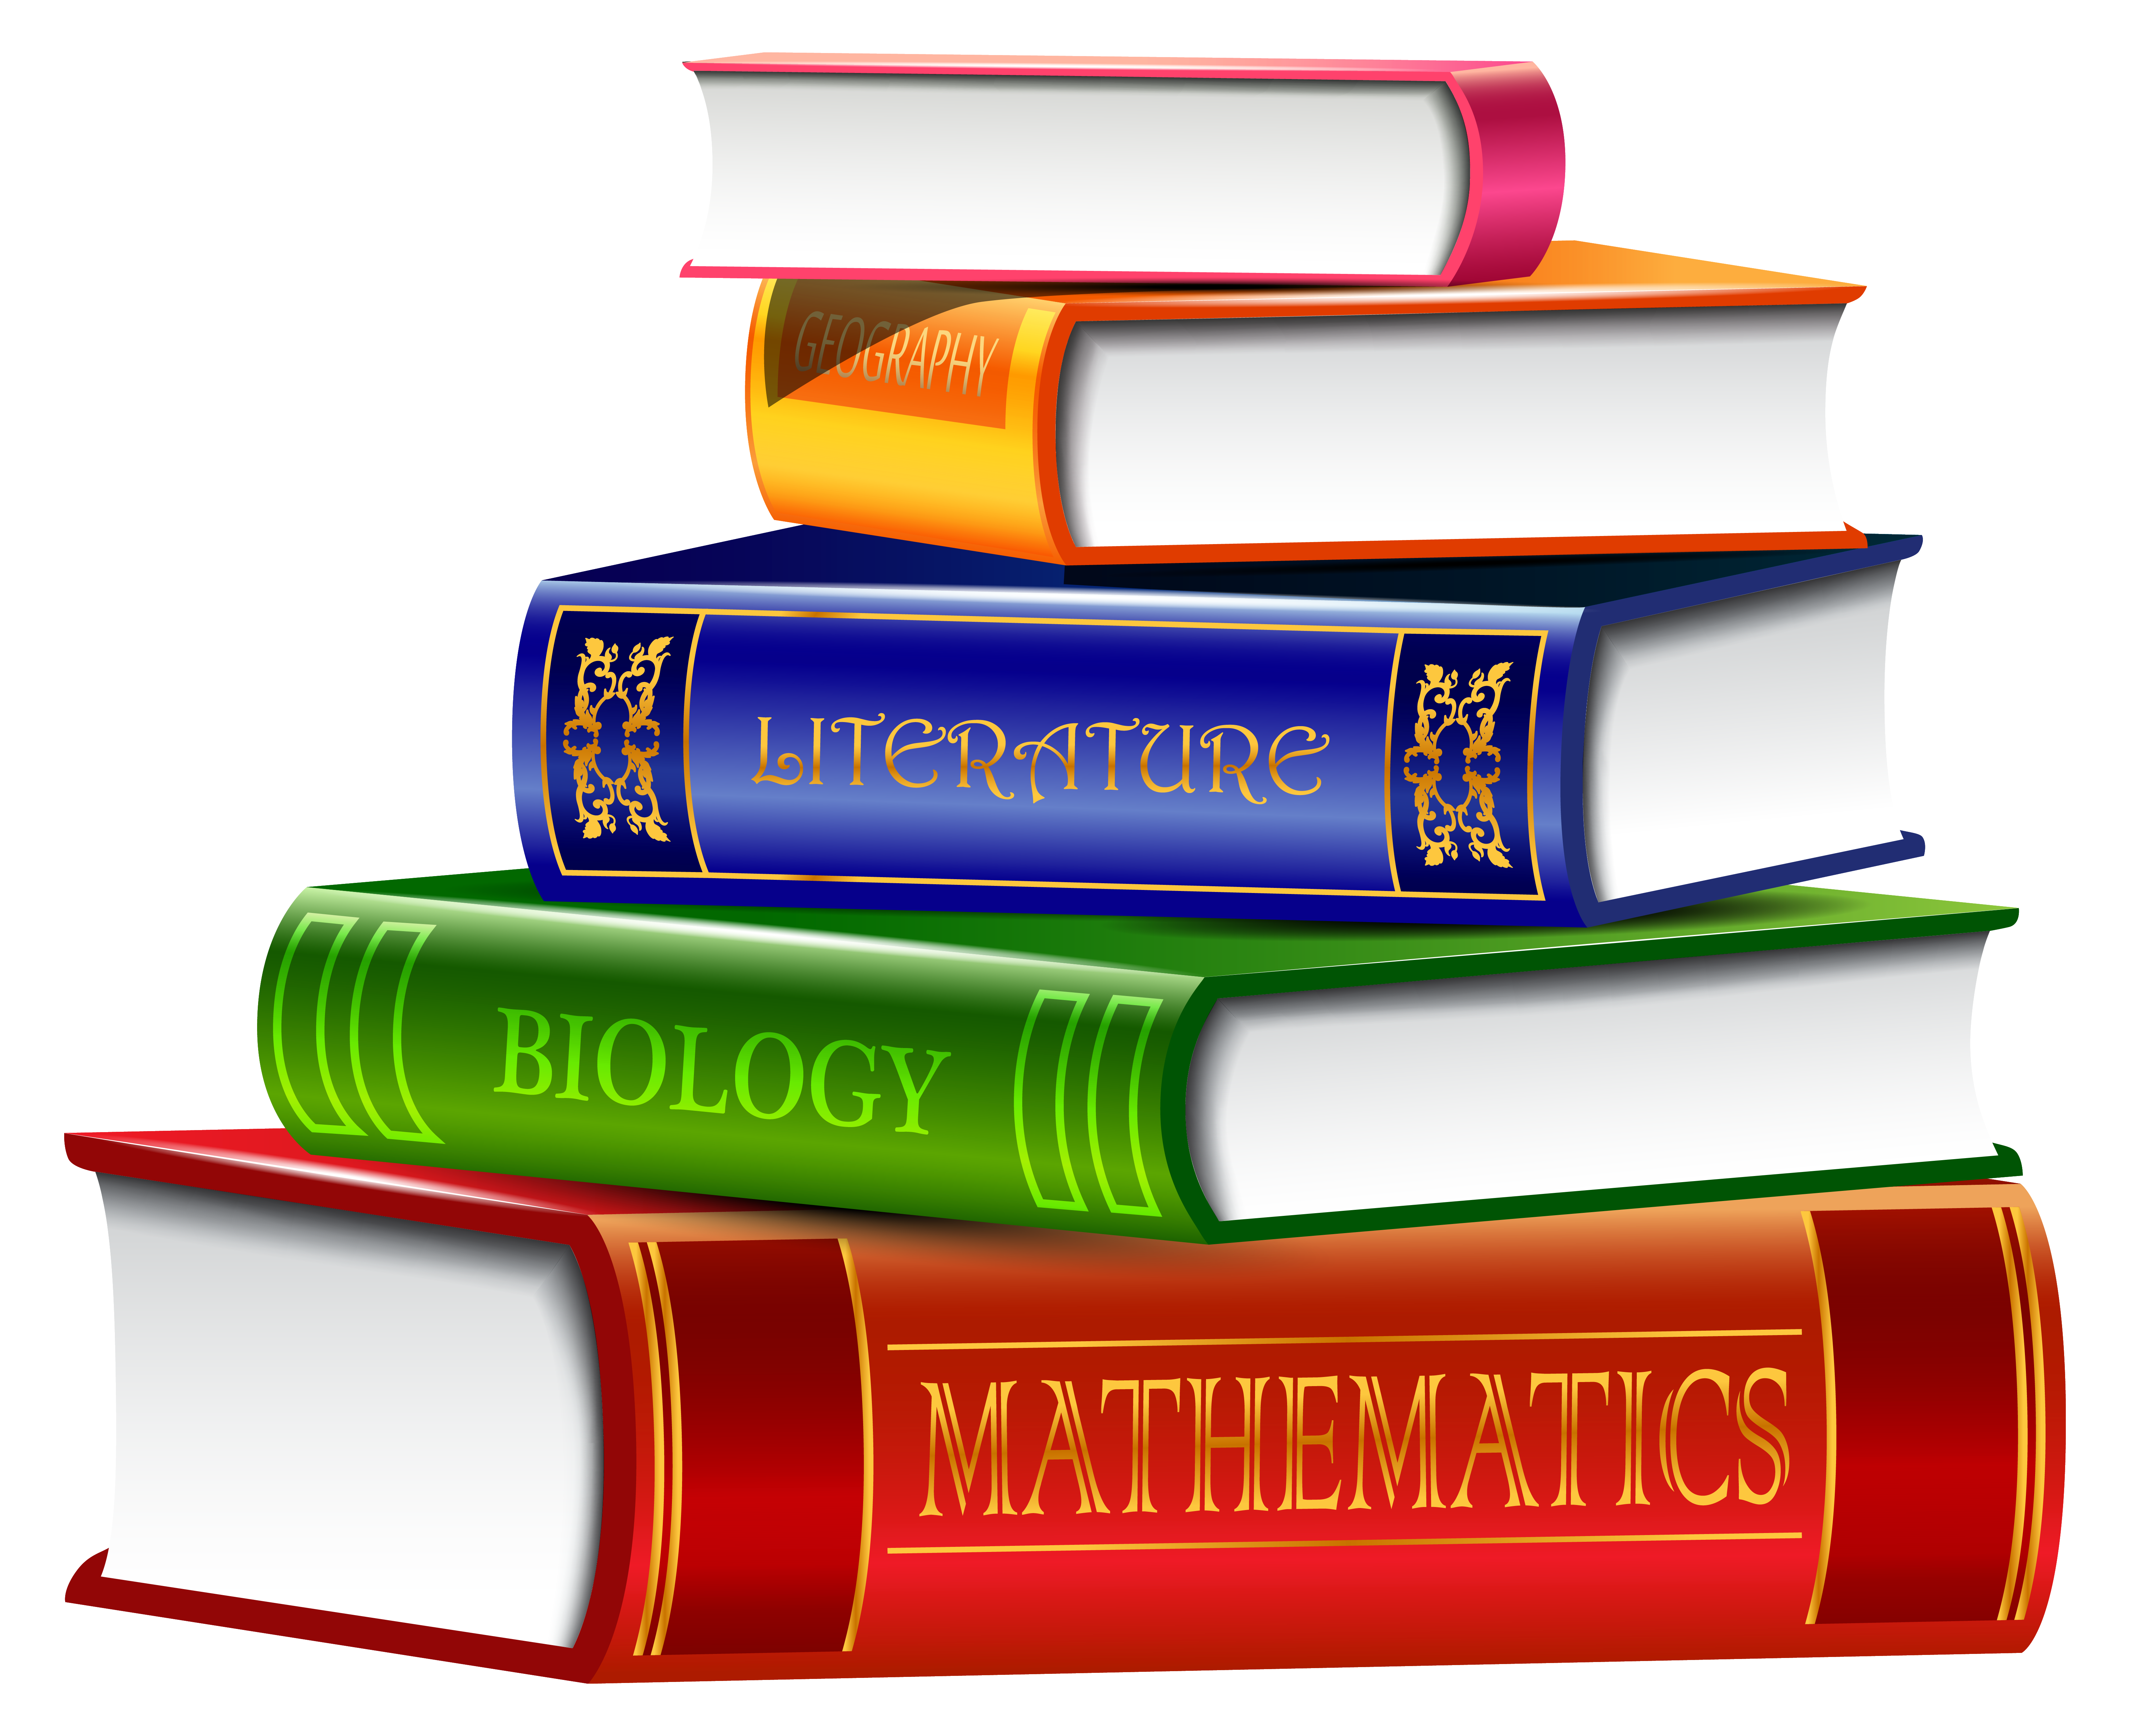

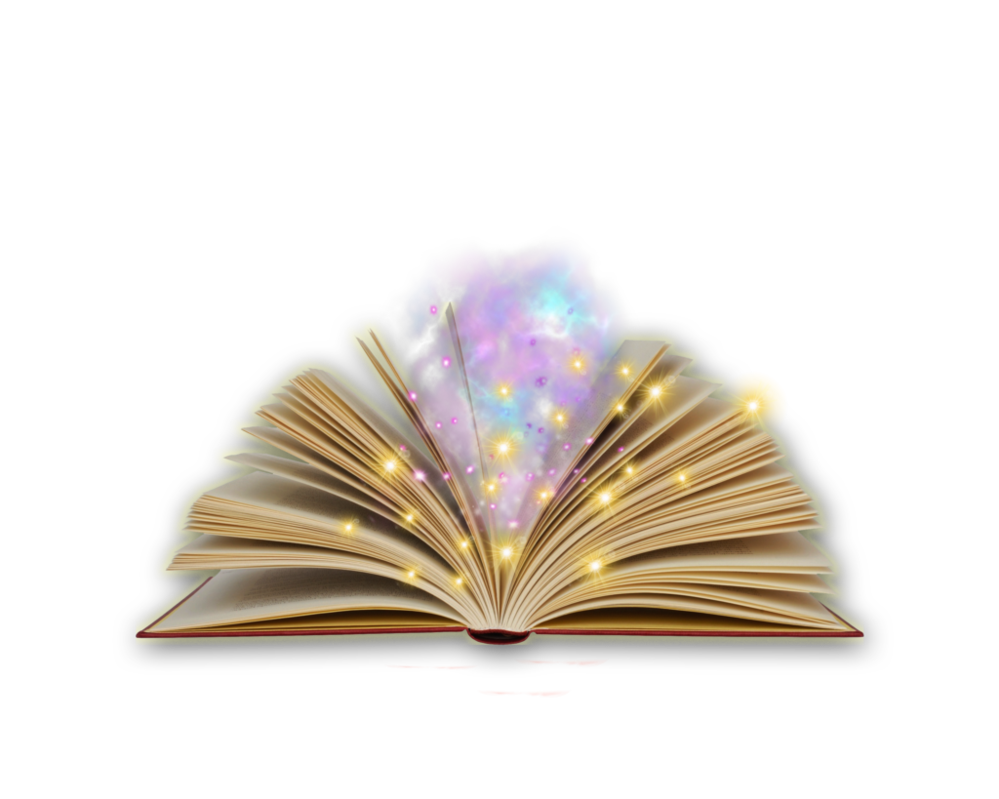

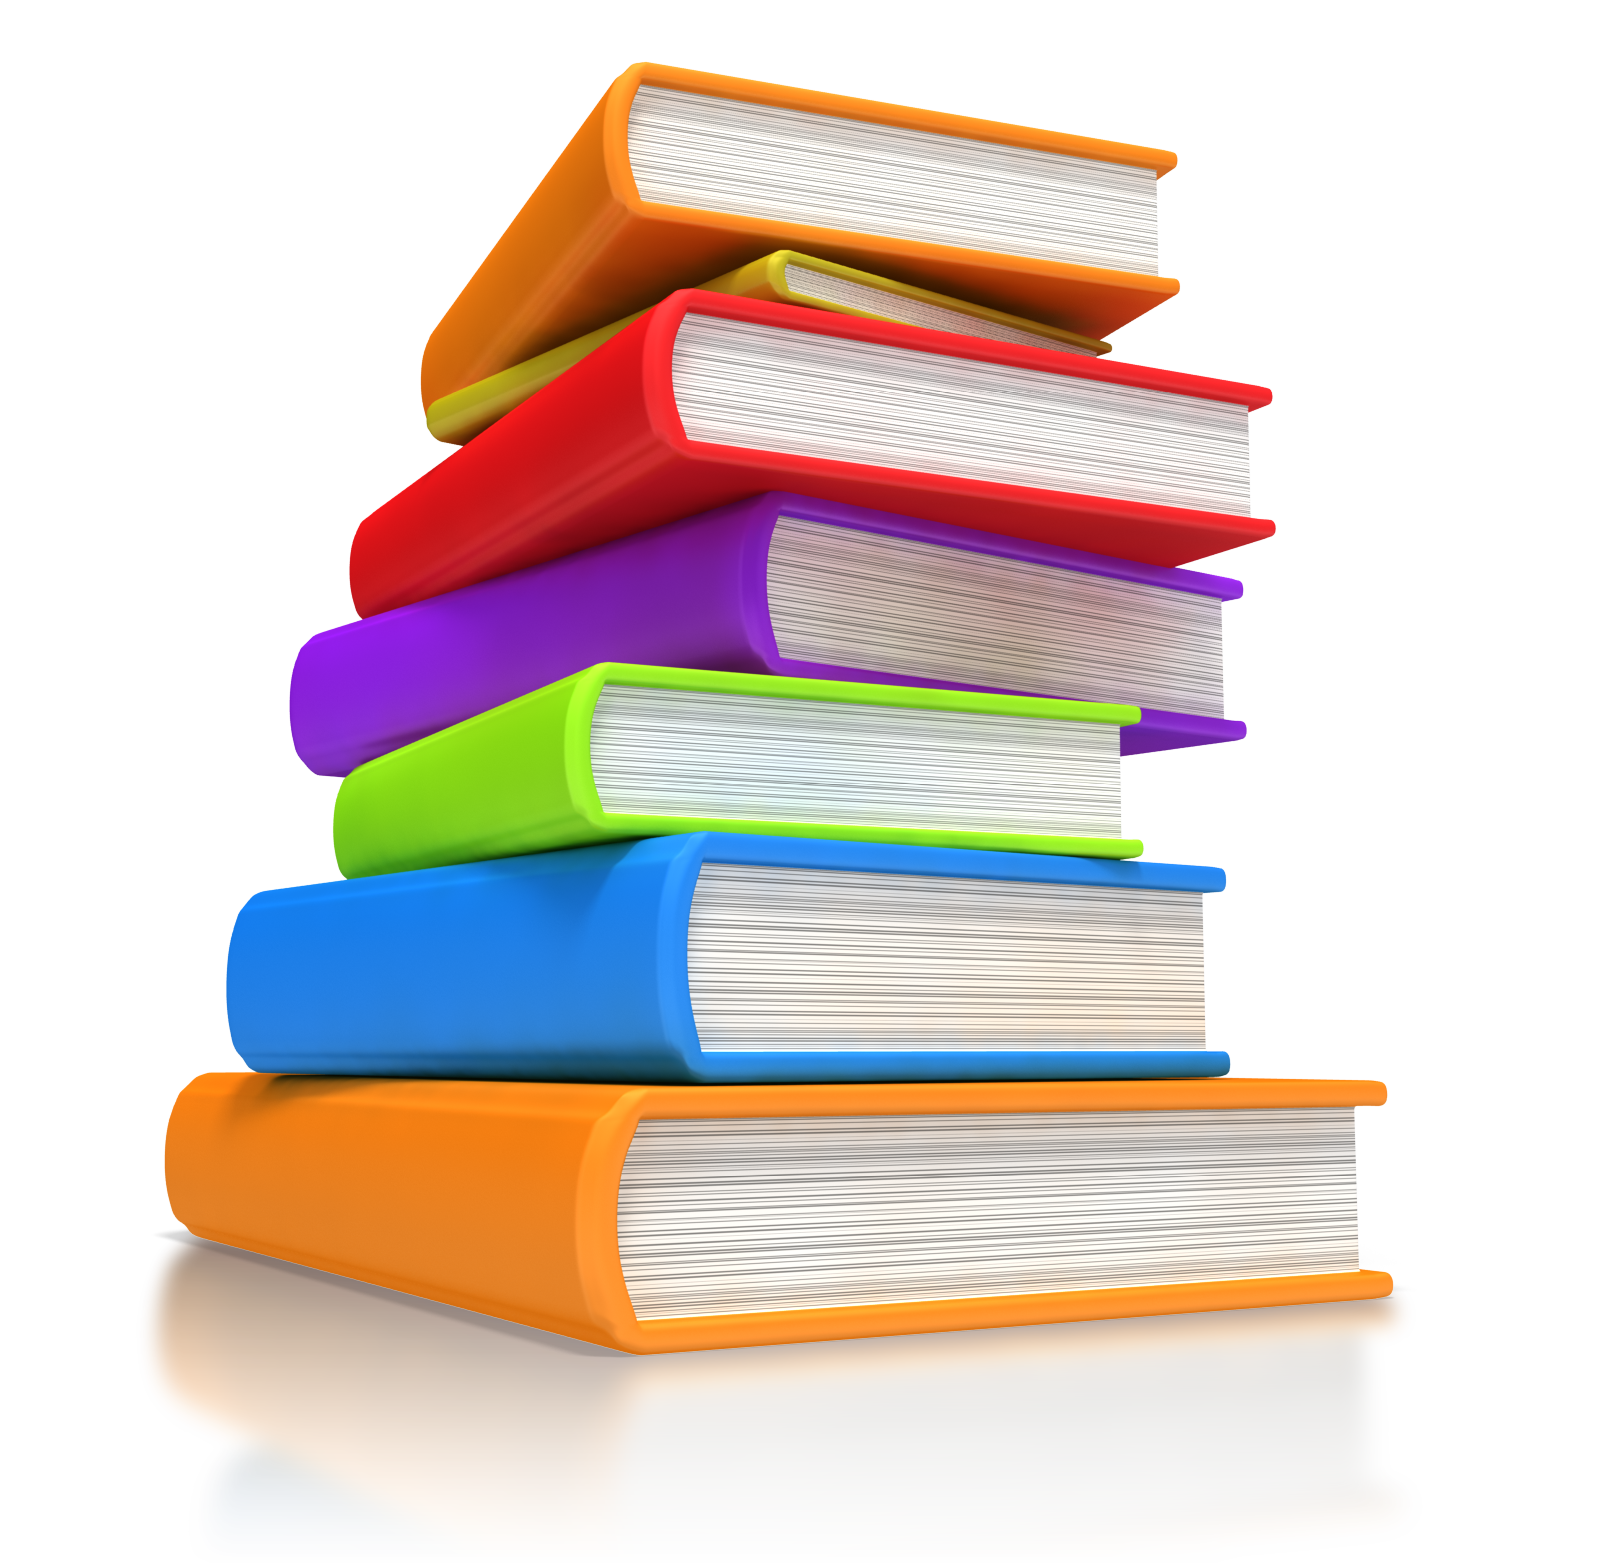

#### Step1---> Import all Important Library:-

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import plotly.express as px
import plotly.graph_objects as go

#### Step2---> Now Load the CSV file from the book_dataset:-

In [ ]:
data = pd.read_csv("books_data.csv")
data.head()

### Step3---> Basic Analysis operation:-

In [31]:
data.head()

bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating  \
0  J.K. Rowling/Mary GrandPré            4.57   
1  J.K. Rowling/Mary GrandPré            4.49   
2                J.K. Rowling            4.42   
3  J.K. Rowling/Mary GrandPré            4.56   
4  J.K. Rowling/Mary GrandPré            4.78   

                                        book_content  
0  Harry Potter and the Half-Blood Prince (Harry ...  
1  Harry Potter and the Order of the Phoenix (Har...  
2  Harry Potter and the Chamber of Secrets (Harry...  
3  Harry Potter and the Prisoner of Azkaban (Harr...  
4  Harry Potter Boxed Set  Books 1-5 (Harry Potte...

In [32]:
data.tail()

bookID                                             title  \
11122   45631  Expelled from Eden: A William T. Vollmann Reader   
11123   45633                       You Bright and Risen Angels   
11124   45634                   The Ice-Shirt (Seven Dreams #1)   
11125   45639                                       Poor People   
11126   45641                       Las aventuras de Tom Sawyer   

                                                 authors  average_rating  \
11122  William T. Vollmann/Larry McCaffery/Michael He...            4.06   
11123                                William T. Vollmann            4.08   
11124                                William T. Vollmann            3.96   
11125                                William T. Vollmann            3.72   
11126                                         Mark Twain            3.91   

                                            book_content  
11122  Expelled from Eden: A William T. Vollmann Read...  
11123    You Bright and Risen Angels William T. Vollmann  
11124  The Ice-Shirt (Seven Dreams #1) William T. Vol...  
11125                    Poor People William T. Vollmann  
11126             Las aventuras de Tom Sawyer Mark Twain

In [2]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating'], dtype='object')

In [33]:
data.isnull().sum()

bookID            0
title             0
authors           0
average_rating    4
book_content      0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bookID          11127 non-null  int64 
 1   title           11127 non-null  object
 2   authors         11127 non-null  object
 3   average_rating  11127 non-null  object
dtypes: int64(1), object(3)
memory usage: 347.8+ KB


In [4]:
data.size

44508

In [5]:
data.shape

(11127, 4)

In [6]:
data.describe()

bookID
count  11127.000000
mean   21310.938887
std    13093.358023
min        1.000000
25%    10287.000000
50%    20287.000000
75%    32104.500000
max    45641.000000

In [7]:
data.head

<bound method NDFrame.head of        bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11122   45631   Expelled from Eden: A William T. Vollmann Reader   
11123   45633                        You Bright and Risen Angels   
11124   45634                    The Ice-Shirt (Seven Dreams #1)   
11125   45639                                        Poor People   
11126   45641                        Las aventuras de Tom Sawyer   

                                                 authors average_rating  
0                             J.K. Rowling/Mary GrandPré           4.57  
1    

### Step4---> Now Check Is Any Value Present or Not

In [34]:
data.isnull().sum()

bookID            0
title             0
authors           0
average_rating    4
book_content      0
dtype: int64

### Step5---> Perform PX Histogram Plot of Distribution Of Avarage Rating:-

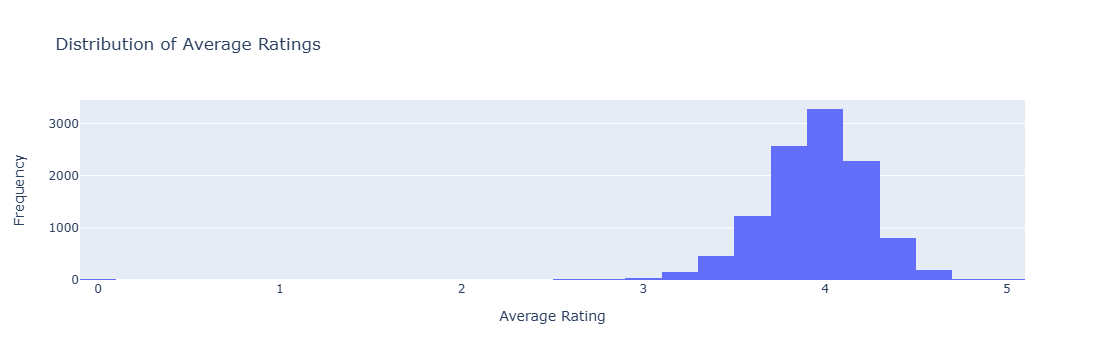

In [36]:
fig = px.histogram(data, x='average_rating', 
                   nbins=50, 
                   title='Distribution of Average Ratings')
fig.update_xaxes(title_text='Average Rating')
fig.update_yaxes(title_text='Frequency')
fig.show()

#### Step6---> Now Chack Number of Books Per Single Author Writen:--

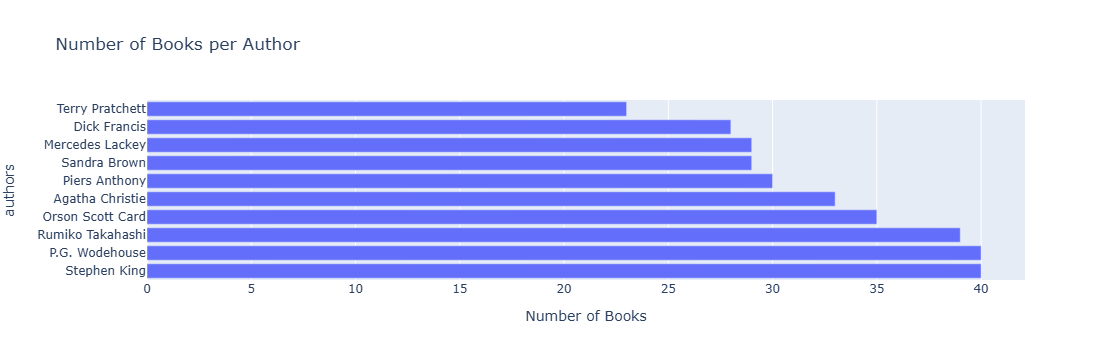

In [35]:
top_authors = data['authors'].value_counts().head(10)
fig = px.bar(top_authors, x=top_authors.values, y=top_authors.index, orientation='h',
             labels={'x': 'Number of Books', 'y': 'Author'},
             title='Number of Books per Author')
fig.show()

In [16]:
# Convert 'average_rating' to a numeric data type
data['average_rating'] = pd.to_numeric(data['average_rating'], 
                                       errors='coerce')

In [17]:
# Create a new column 'book_content' by combining 'title' and 'authors'
data['book_content'] = data['title'] + ' ' + data['authors']

In [18]:
data.head()

bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating  \
0  J.K. Rowling/Mary GrandPré            4.57   
1  J.K. Rowling/Mary GrandPré            4.49   
2                J.K. Rowling            4.42   
3  J.K. Rowling/Mary GrandPré            4.56   
4  J.K. Rowling/Mary GrandPré            4.78   

                                        book_content  
0  Harry Potter and the Half-Blood Prince (Harry ...  
1  Harry Potter and the Order of the Phoenix (Har...  
2  Harry Potter and the Chamber of Secrets (Harry...  
3  Harry Potter and the Prisoner of Azkaban (Harr...  
4  Harry Potter Boxed Set  Books 1-5 (Harry Potte...

In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['book_content'])

In [20]:
# Compute the cosine similarity between books
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [27]:
def recommend_books(book_title, cosine_sim=cosine_sim):
    # Get the index of the book that matches the title
    idx = data[data['title'] == book_title].index[0]

    # Get the cosine similarity scores for all books with this book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar books (excluding the input book)
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 recommended books
    return data['title'].iloc[book_indices]

In [28]:
book_title = "Seven Plays"
recommended_books = recommend_books(book_title)
print(recommended_books)

3322                               Buried Child
3559     See You Around  Sam! (Sam Krupnik  #3)
2871                Sam Walton: Made In America
4854    The Secret Seven (The Secret Seven  #1)
7768                               Seven Novels
7978                      The Atlantis Dialogue
2205                          Early Candlelight
449                       Medea and Other Plays
452                 The Bacchae and Other Plays
5850                                 Waterworks
Name: title, dtype: object


     _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  _  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  _ _ _ _  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
     
###  | Conclusion by Abhishek:-- So You can See over there Here is the Predicted Book For You Hope You Like Most |
     _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  _  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  _ _ _ _  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

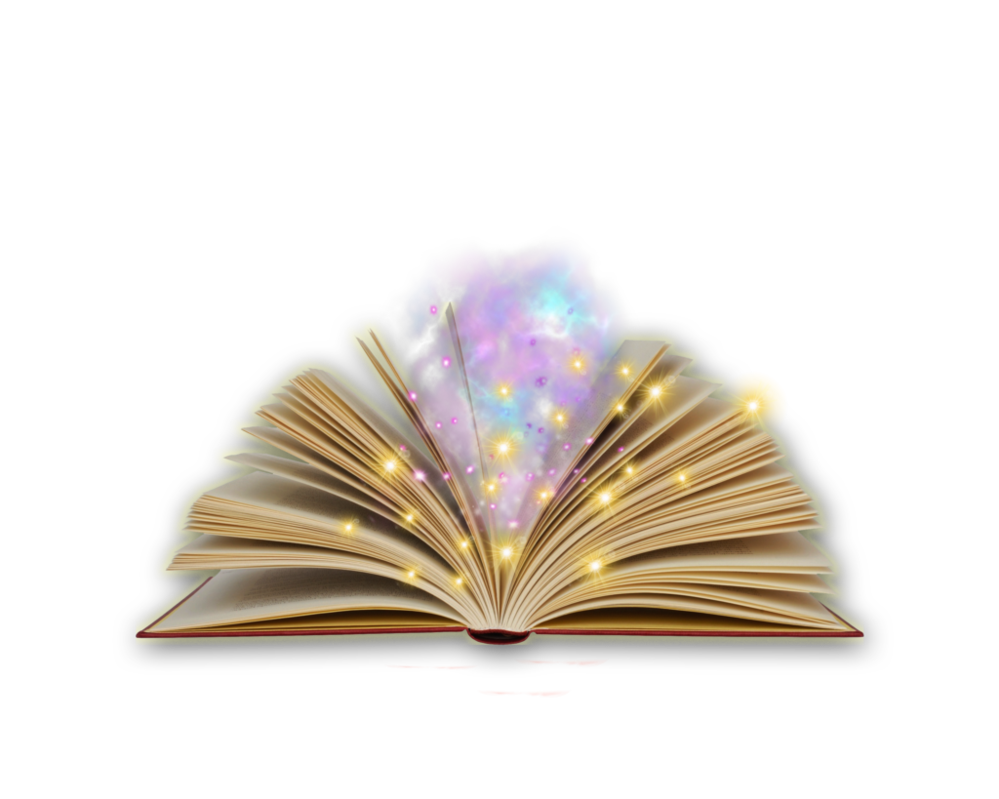